In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed dataset (for training)
processed_data = pd.read_csv('01_Data_Processed.csv')
print("Processed Data Shape:", processed_data.shape)
print(processed_data.head())

Processed Data Shape: (9009, 11)
                epoch (ms)  Accelerometer_x  Accelerometer_y  Accelerometer_z  \
0  2019-01-11 15:08:05.200         0.013500         0.977000        -0.071000   
1  2019-01-11 15:08:05.400        -0.001500         0.970500        -0.079500   
2  2019-01-11 15:08:05.600         0.001333         0.971667        -0.064333   
3  2019-01-11 15:08:05.800        -0.024000         0.957000        -0.073500   
4  2019-01-11 15:08:06.000        -0.028000         0.957667        -0.115000   

   Gyroscope_x  Gyroscope_y  Gyroscope_z Participants  Label Category  Set  
0      -1.8904       2.4392       0.9388            B  bench    heavy   30  
1      -1.6826      -0.8904       2.1708            B  bench    heavy   30  
2       2.5608      -0.2560      -1.4146            B  bench    heavy   30  
3       8.0610      -4.5244      -2.0730            B  bench    heavy   30  
4       2.4390      -1.5486      -3.6098            B  bench    heavy   30  


In [ ]:
# Load the raw phyphox accelerometer data
acc_data = pd.read_csv('Accelerometer.csv')
print("\nAccelerometer Data Shape:", acc_data.shape)
print(acc_data.head())


Accelerometer Data Shape: (522, 4)
   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0  0.022779  -0.988694   5.957012   7.944879
1  0.223861  -0.831221   5.843698   7.926018
2  0.424943  -0.869841   5.898334   7.800130
3  0.626024  -0.486039   5.676645   7.915989
4  0.827106  -0.877026   5.795349   7.801177


In [ ]:
processed_data.drop(columns=['Category', 'Set'], inplace=True)

In [ ]:
# Load the raw phyphox gyroscope data
gyro_data = pd.read_csv('Gyroscope.csv')
print("\nGyroscope Data Shape:", gyro_data.shape)
print(gyro_data.head())


Gyroscope Data Shape: (523, 4)
   Time (s)  X (rad/s)  Y (rad/s)  Z (rad/s)
0  0.010211   0.091835   0.076221   0.033509
1  0.211293  -0.098322  -0.045115  -0.057847
2  0.412375  -0.073684  -0.016037   0.040944
3  0.613456   0.078835   0.032647   0.032301
4  0.814538  -0.001788   0.040203  -0.245222


In [ ]:
gyro_data = gyro_data.rename(columns={
    "Time (s)": "timestamp",
    "X (rad/s)": "gyro_x",
    "Y (rad/s)": "gyro_y",
    "Z (rad/s)": "gyro_z"
})

acc_data = acc_data.rename(columns={
    "Time (s)": "timestamp",
    "X (m/s^2)": "acc_x",
    "Y (m/s^2)": "acc_y",
    "Z (m/s^2)": "acc_z"
})

In [ ]:
# Convert the relative time to datetime using the same base_time
acc_data['timestamp'] =  pd.to_timedelta(acc_data['timestamp'], unit='ns')

In [ ]:
print(acc_data.head())

  timestamp     acc_x     acc_y     acc_z
0    0 days -0.988694  5.957012  7.944879
1    0 days -0.831221  5.843698  7.926018
2    0 days -0.869841  5.898334  7.800130
3    0 days -0.486039  5.676645  7.915989
4    0 days -0.877026  5.795349  7.801177


In [ ]:
gyro_data['timestamp'] =  pd.to_timedelta(gyro_data['timestamp'], unit='ns')

In [ ]:
print(gyro_data.head())

  timestamp    gyro_x    gyro_y    gyro_z
0    0 days  0.091835  0.076221  0.033509
1    0 days -0.098322 -0.045115 -0.057847
2    0 days -0.073684 -0.016037  0.040944
3    0 days  0.078835  0.032647  0.032301
4    0 days -0.001788  0.040203 -0.245222


In [ ]:
acc_data_clean = acc_data.dropna(subset=['timestamp', 'acc_x', 'acc_y', 'acc_z']).sort_values(by='timestamp').reset_index(drop=True)
gyro_data_clean = gyro_data.dropna(subset=['timestamp', 'gyro_x', 'gyro_y', 'gyro_z']).sort_values(by='timestamp').reset_index(drop=True)


In [ ]:
# Increase tolerance to 250ms to allow for more matching of timestamps
phyphox_data = pd.merge_asof(acc_data_clean, gyro_data_clean, on='timestamp', direction='nearest', tolerance=pd.Timedelta("250ms"))
phyphox_data = phyphox_data.dropna()  # drop rows where no match was found

print("Merged Phyphox Data (with 250ms tolerance):")
print(phyphox_data.head())
print("Merged Phyphox Data Shape:", phyphox_data.shape)


Merged Phyphox Data (with 250ms tolerance):
  timestamp     acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z
0    0 days -0.988694  5.957012  7.944879 -0.001788  0.040203 -0.245222
1    0 days -0.831221  5.843698  7.926018 -0.001788  0.040203 -0.245222
2    0 days -0.869841  5.898334  7.800130 -0.001788  0.040203 -0.245222
3    0 days -0.486039  5.676645  7.915989 -0.001788  0.040203 -0.245222
4    0 days -0.877026  5.795349  7.801177 -0.001788  0.040203 -0.245222
Merged Phyphox Data Shape: (522, 7)


In [ ]:
print(phyphox_data.head())
print("Merged Phyphox Data Shape:", phyphox_data.shape)


  timestamp     acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z
0    0 days -0.988694  5.957012  7.944879 -0.001788  0.040203 -0.245222
1    0 days -0.831221  5.843698  7.926018 -0.001788  0.040203 -0.245222
2    0 days -0.869841  5.898334  7.800130 -0.001788  0.040203 -0.245222
3    0 days -0.486039  5.676645  7.915989 -0.001788  0.040203 -0.245222
4    0 days -0.877026  5.795349  7.801177 -0.001788  0.040203 -0.245222
Merged Phyphox Data Shape: (522, 7)


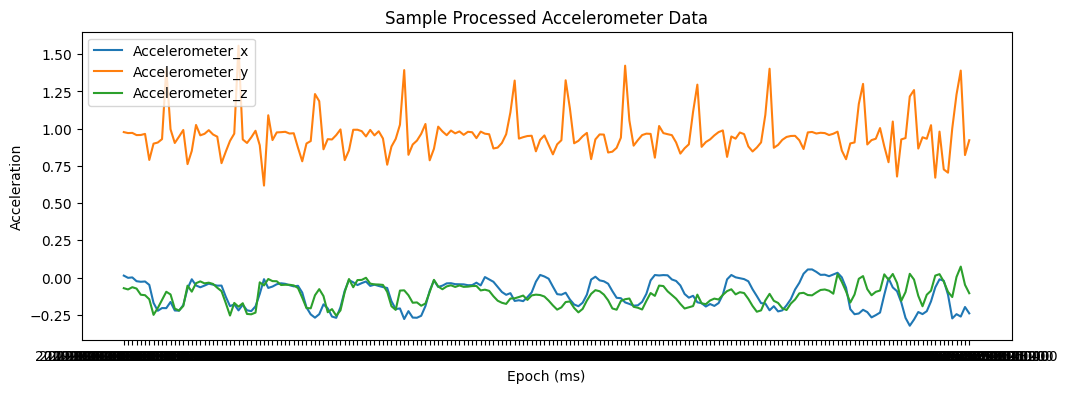

In [ ]:
# Plot a sample from the processed data (using the first 200 rows)
plt.figure(figsize=(12, 4))
plt.plot(processed_data['epoch (ms)'][:200], processed_data['Accelerometer_x'][:200], label='Accelerometer_x')
plt.plot(processed_data['epoch (ms)'][:200], processed_data['Accelerometer_y'][:200], label='Accelerometer_y')
plt.plot(processed_data['epoch (ms)'][:200], processed_data['Accelerometer_z'][:200], label='Accelerometer_z')
plt.title("Sample Processed Accelerometer Data")
plt.xlabel("Epoch (ms)")
plt.ylabel("Acceleration")
plt.legend()
plt.show()

In [ ]:
# Rename columns for clarity
processed_data_clean= processed_data.rename(columns={
    'epoch (ms)': 'timestamp',
    'Accelerometer_x': 'acc_x',
    'Accelerometer_y': 'acc_y',
    'Accelerometer_z': 'acc_z',
    'Gyroscope_x': 'gyro_x',
    'Gyroscope_y': 'gyro_y',
    'Gyroscope_z': 'gyro_z',
    'Label': 'exercise_label'
})
print("Processed Data Columns After Renaming:")
print(processed_data_clean.columns)

Processed Data Columns After Renaming:
Index(['timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',
       'Participants', 'exercise_label'],
      dtype='object')


In [ ]:
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [ ]:
processed_data_clean['acc_x'] = butter_lowpass_filter(processed_data_clean['acc_x'], 10, 100)
processed_data_clean['acc_y'] = butter_lowpass_filter(processed_data_clean['acc_y'], 10, 100)
processed_data_clean['acc_z'] = butter_lowpass_filter(processed_data_clean['acc_z'], 10, 100)
processed_data_clean['gyro_x'] = butter_lowpass_filter(processed_data_clean['gyro_x'], 10, 100)
processed_data_clean['gyro_y'] = butter_lowpass_filter(processed_data_clean['gyro_y'], 10, 100)
processed_data_clean['gyro_z'] = butter_lowpass_filter(processed_data_clean['gyro_z'], 10, 100)

In [ ]:
processed_data_clean.head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Participants,exercise_label
0,2019-01-11 15:08:05.200,0.013690,0.976042,-0.071039,-1.843407,2.481249,0.888881,B,bench
1,2019-01-11 15:08:05.400,0.012966,0.954849,-0.077697,0.936797,1.626472,-1.178387,B,bench
2,2019-01-11 15:08:05.600,0.007854,0.935711,-0.086567,3.363290,0.957795,-3.356950,B,bench
3,2019-01-11 15:08:05.800,-0.005015,0.921039,-0.098854,5.163731,0.585885,-5.626870,B,bench
4,2019-01-11 15:08:06.000,-0.027408,0.913984,-0.114278,6.185175,0.486314,-7.762088,B,bench


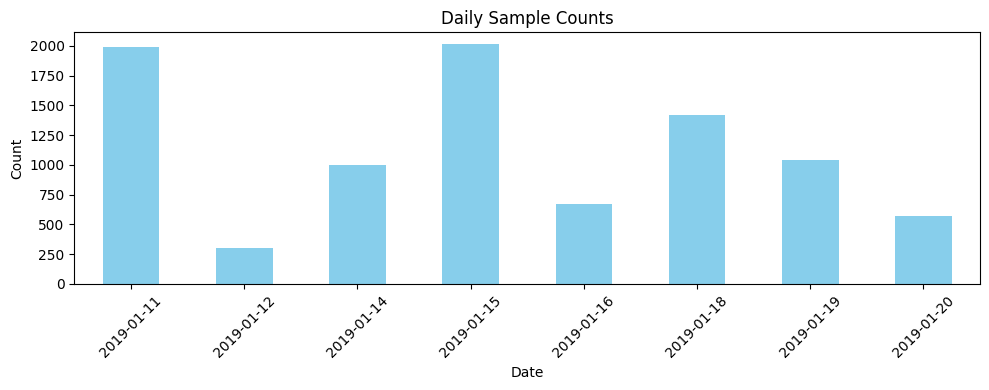

In [ ]:
# Convert the DataFrame to a time-based index (if not already done)
processed_data_clean = processed_data_clean.set_index('timestamp').sort_index()
processed_data_clean.index = pd.to_datetime(processed_data_clean.index)

# Calculate daily counts
# Assuming 'timestamp' is the column containing the timestamp information in processed_data_clean
daily_counts = processed_data_clean.groupby(processed_data_clean.index.date).size()

# Plot the daily counts as a bar chart
plt.figure(figsize=(10, 4))
daily_counts.plot(kind='bar', color='skyblue')
plt.title("Daily Sample Counts")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
processed_data_clean.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Participants,exercise_label
timestamp,,,,,,,,
2019-01-11 15:08:05.200,0.013690,0.976042,-0.071039,-1.843407,2.481249,0.888881,B,bench
2019-01-11 15:08:05.400,0.012966,0.954849,-0.077697,0.936797,1.626472,-1.178387,B,bench
2019-01-11 15:08:05.600,0.007854,0.935711,-0.086567,3.363290,0.957795,-3.356950,B,bench
2019-01-11 15:08:05.800,-0.005015,0.921039,-0.098854,5.163731,0.585885,-5.626870,B,bench
2019-01-11 15:08:06.000,-0.027408,0.913984,-0.114278,6.185175,0.486314,-7.762088,B,bench


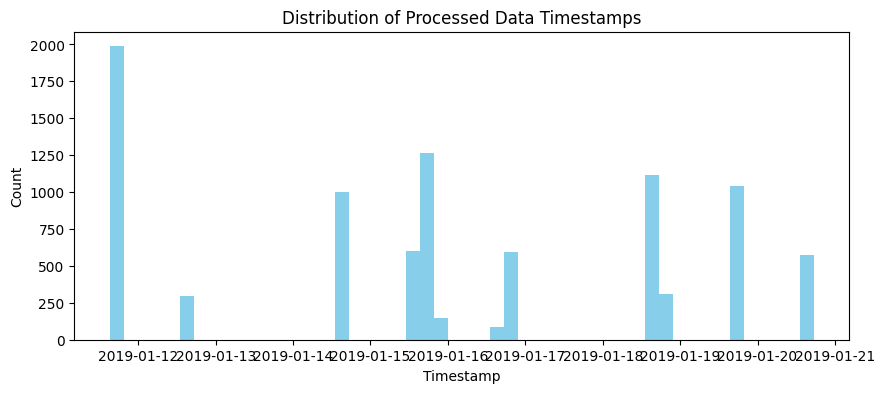

In [ ]:
# Plot distribution of timestamps to check preparation
plt.figure(figsize=(10, 4))
plt.hist(processed_data_clean.index.dropna(), bins=50, color='skyblue')
plt.title("Distribution of Processed Data Timestamps")
plt.xlabel("Timestamp")
plt.ylabel("Count")
plt.show()

In [ ]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def compute_features(window):
    """
    Compute statistical features for a given window of sensor data.
    Returns a pandas Series of features.
    """
    features = {}
    # Accelerometer features: mean and std across axes
    features['acc_mean'] = window[['acc_x', 'acc_y', 'acc_z']].mean().mean()
    features['acc_std'] = window[['acc_x', 'acc_y', 'acc_z']].std().mean()
    # Gyroscope features: mean and std across axes
    features['gyro_mean'] = window[['gyro_x', 'gyro_y', 'gyro_z']].mean().mean()
    features['gyro_std'] = window[['gyro_x', 'gyro_y', 'gyro_z']].std().mean()

    # Filter accelerometer data (acc_x) - Assuming a cutoff of 10 Hz and sample rate of 100 Hz
    # Adjust these parameters if necessary


    return pd.Series(features)

In [ ]:
# Define window size (number of samples per window)
window_size = 50

In [ ]:
# Segment the processed data (which is time-indexed)
segments = []
labels = []

In [ ]:
# processed_data_clean is already set with 'timestamp' as index
for start in range(0, len(processed_data_clean) - window_size, window_size):
    window = processed_data_clean.iloc[start:start+window_size]
    segments.append(compute_features(window))
    # Use the most frequent exercise label in the window as the label
    labels.append(window['exercise_label'].mode()[0])

features_df = pd.concat(segments, axis=1).T
features_df['label'] = labels

In [ ]:
# Display the first few rows of the extracted features
print("Extracted Features:")
print(features_df.head())

Extracted Features:
   acc_mean   acc_std  gyro_mean  gyro_std  label
0  0.238640  0.060705  -0.187674  5.049311  bench
1  0.252430  0.054675  -0.038570  4.641238  bench
2  0.238369  0.050321  -0.382123  5.850381  bench
3  0.244838  0.072213  -0.072817  5.004722  bench
4  0.250903  0.066928   0.122922  5.585878  bench


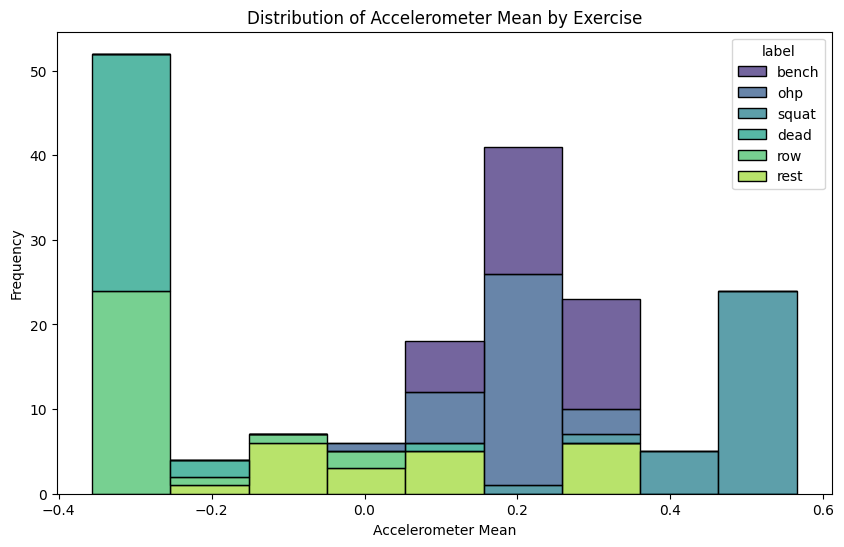

In [ ]:
# Visualize the distribution of one feature (e.g., accelerometer mean) by exercise label
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(data=features_df, x='acc_mean', hue='label', multiple='stack', palette="viridis")
plt.title('Distribution of Accelerometer Mean by Exercise')
plt.xlabel('Accelerometer Mean')
plt.ylabel('Frequency')
plt.show()

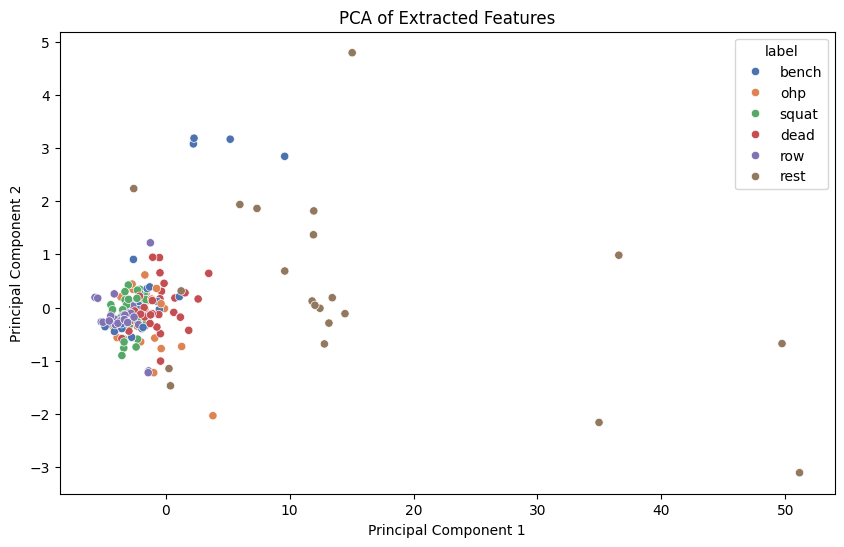

In [ ]:
# Perform PCA on the feature set (excluding the label) to inspect clustering
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_df.drop(columns=['label']))
features_df['pca1'] = pca_components[:, 0]
features_df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=features_df, x='pca1', y='pca2', hue='label', palette="deep")
plt.title('PCA of Extracted Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [ ]:
# 6. Data Splitting (Training Data)
# ---------------------------
# For training, we drop the PCA columns since they're only for visualization.
X = features_df.drop(columns=['label', 'pca1', 'pca2'])
y = features_df['label']

In [ ]:
# Split into training and testing sets (80% training, 20% testing)


In [ ]:
from sklearn.preprocessing import StandardScaler

# ... (your existing code for data splitting - X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)


Training set shape: (144, 4)
Testing set shape: (36, 4)


In [ ]:
# 7. Model Training
# ---------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest training completed.")

Random Forest training completed.


In [ ]:
# 8. Model Evaluation
# ---------------------------
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

       bench       0.29      0.67      0.40         3
        dead       1.00      0.83      0.91         6
         ohp       0.88      0.58      0.70        12
        rest       0.83      1.00      0.91         5
         row       0.75      1.00      0.86         3
       squat       1.00      0.86      0.92         7

    accuracy                           0.78        36
   macro avg       0.79      0.82      0.78        36
weighted avg       0.85      0.78      0.80        36



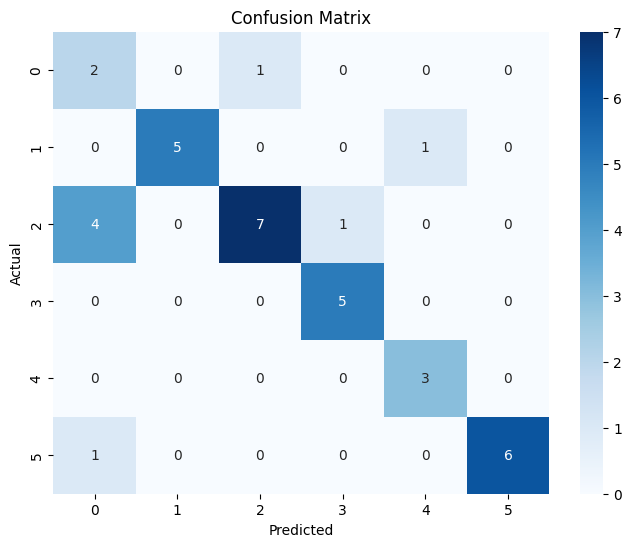

In [ ]:
# Plot confusion matrix for visual insight
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# --- Phyphox Data Segmentation and Feature Extraction (Simulated Real-Time) ---
# ... (your existing code for loading and preprocessing phyphox data)

# Apply low-pass filter to phyphox data - **NEW**
cutoff_frequency = 10  # Example cutoff frequency in Hz (adjust as needed)
sampling_rate = 50  # Example sampling rate in Hz (adjust as needed)

# Filter relevant columns (e.g., 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z')
# Instead of directly accessing features_phyphox, use the original phyphox_data
filtered_acc_x = butter_lowpass_filter(phyphox_data['acc_x'], cutoff_frequency, sampling_rate)
filtered_acc_y = butter_lowpass_filter(phyphox_data['acc_y'], cutoff_frequency, sampling_rate)
filtered_acc_z = butter_lowpass_filter(phyphox_data['acc_z'], cutoff_frequency, sampling_rate)

# ... (apply filter to other relevant columns in phyphox_data similarly)

# Add the filtered columns to features_phyphox
features_phyphox['acc_x_filtered'] = filtered_acc_x[:len(features_phyphox)] #Ensure length compatibility
features_phyphox['acc_y_filtered'] = filtered_acc_y[:len(features_phyphox)] #Ensure length compatibility
features_phyphox['acc_z_filtered'] = filtered_acc_z[:len(features_phyphox)] #Ensure length compatibility

# ... (add other filtered columns to features_phyphox)

# ... (continue with feature extraction and real-time inference)

In [ ]:
# --- Phyphox Data Segmentation and Feature Extraction (Simulated Real-Time) ---
segments_phyphox = []
time_stamps = []

# Define window size (number of samples per window); make sure it matches your previous setting.
window_size = 50

# Check if phyphox_data is empty
if phyphox_data.empty:
    print("Error: phyphox_data is empty. Please check data loading and merging.")
else:
    for start in range(0, len(phyphox_data) - window_size, window_size):
        window = phyphox_data.iloc[start:start+window_size]
        segments_phyphox.append(compute_features(window))
        time_stamps.append(window['timestamp'].iloc[0])  # record the starting timestamp of the window

    features_phyphox = pd.concat(segments_phyphox, axis=1).T
    features_phyphox['timestamp'] = time_stamps

    print("Extracted features from phyphox data:")
    print(features_phyphox.head())

Extracted features from phyphox data:
   acc_mean   acc_std  gyro_mean  gyro_std                 timestamp
0  3.569879  1.684966  -0.054608  0.164449           0 days 00:00:00
1  4.463284  1.955427   0.135663  0.532386 0 days 00:00:00.000000010
2  4.718327  0.759534  -0.031822  0.159659 0 days 00:00:00.000000020
3  4.727963  0.218027   0.014188  0.060014 0 days 00:00:00.000000030
4  4.490136  0.416909  -0.025925  0.086392 0 days 00:00:00.000000040


In [ ]:
# ## 9. Simulate Real-Time Inference on Phyphox Data
#
# In this step, we use the extracted features from the merged phyphox data (simulated real-time input) and feed them into the trained model to obtain predictions. We then plot the predicted exercise labels over time for visual insight.

# %%
# Predict exercise labels on phyphox data features (excluding the timestamp column)
phyphox_predictions = rf_model.predict(features_phyphox.drop(columns=['timestamp']))

# Combine predictions with the corresponding timestamps for visualization
real_time_results = features_phyphox[['timestamp']].copy()
real_time_results['predicted_exercise'] = phyphox_predictions


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("Simulated Real-Time Inference (Sample):")
print(real_time_results.head())

Simulated Real-Time Inference (Sample):
                  timestamp predicted_exercise
0           0 days 00:00:00              squat
1 0 days 00:00:00.000000010              squat
2 0 days 00:00:00.000000020              squat
3 0 days 00:00:00.000000030              squat
4 0 days 00:00:00.000000040              squat


Filtered Timestamp range: 0 days 00:00:00 to 0 days 00:00:00.000000090


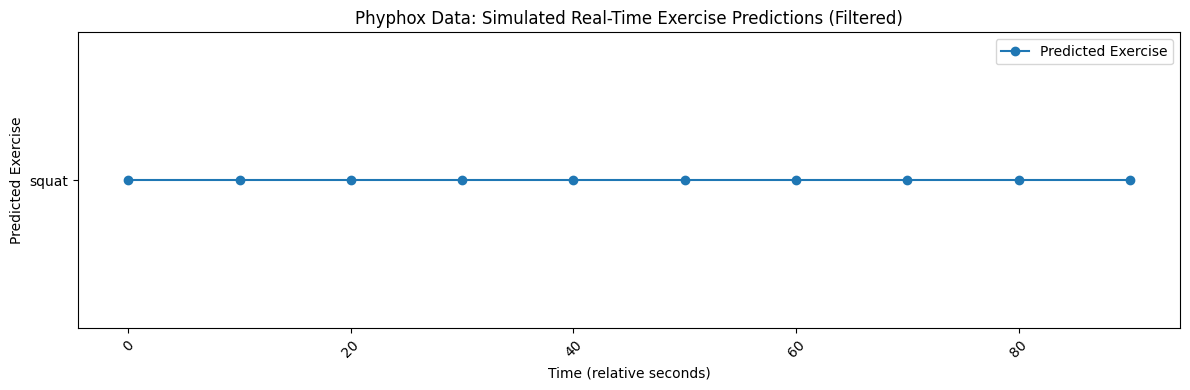

In [ ]:
# Define the start and end as timedeltas
start_delta = pd.Timedelta(seconds=0)
end_delta = pd.Timedelta(minutes=1, seconds=30)

# Create a mask for the valid range
mask = (real_time_results['timestamp'] >= start_delta) & (real_time_results['timestamp'] <= end_delta)
real_time_results_valid = real_time_results[mask]

print("Filtered Timestamp range:",
      real_time_results_valid['timestamp'].min(),
      "to",
      real_time_results_valid['timestamp'].max())

# Now plot using the filtered data
import matplotlib.dates as mdates
plt.figure(figsize=(12,4))
plt.plot(real_time_results_valid['timestamp'], real_time_results_valid['predicted_exercise'], 'o-', label='Predicted Exercise')
# Since these are timedeltas, we can simply format the x-axis in seconds:
plt.title("Phyphox Data: Simulated Real-Time Exercise Predictions (Filtered)")
plt.xlabel("Time (relative seconds)")
plt.ylabel("Predicted Exercise")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# =============================
# Optionally, Save the Trained Model
# =============================
import joblib
model_filename = 'rf_exercise_classifier.pkl'
joblib.dump(rf_model, model_filename)
print(f"Model saved as '{model_filename}'.")


Model saved as 'rf_exercise_classifier.pkl'.
